In [54]:
%load_ext autoreload
%autoreload 2
from tensorflow.keras import models
from MeteoStat.data import open_data
import datetime as dt
from MeteoStat.data import open_data, scrapping_images
from MeteoStat.preprocessing import preproc_data
import numpy as np
from MeteoStat.visualization import make_gif
from MeteoStat.visualization import show_image, show_images
import matplotlib.figure
import matplotlib.pyplot as plt


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
model = models.load_model("AJ_my_model_mse")

2022-03-08 15:18:04.290562: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, None, 84, 130, 1  0         
                             )]                                  
                                                                 
 conv_lstm2d_11 (ConvLSTM2D)  (None, None, 84, 130, 16  278592   
                             )                                   
                                                                 
 batch_normalization_7 (Batc  (None, None, 84, 130, 16  64       
 hNormalization)             )                                   
                                                                 
 conv_lstm2d_12 (ConvLSTM2D)  (None, None, 84, 130, 24  245856   
                             )                                   
                                                                 
 batch_normalization_8 (Batc  (None, None, 84, 130, 24  96 

In [57]:
date = '2018/01/03'

In [58]:
start = dt.datetime.strptime(date,'%Y/%m/%d')
finish = start + dt.timedelta(minutes=150)
saved_images = scrapping_images(start, finish)
imgs = []
preproc_images = []
for date_save in saved_images:
    imgs.append(open_data(date_save))

#transform them into preprocessed X images
for img in imgs:
    preproc_images.append(preproc_data(img))



https://static.infoclimat.net/cartes/compo/2018/01/03/color_030015.jpg 2018_01_03_0015
https://static.infoclimat.net/cartes/compo/2018/01/03/color_030030.jpg 2018_01_03_0030
https://static.infoclimat.net/cartes/compo/2018/01/03/color_030045.jpg 2018_01_03_0045
https://static.infoclimat.net/cartes/compo/2018/01/03/color_030100.jpg 2018_01_03_0100
https://static.infoclimat.net/cartes/compo/2018/01/03/color_030115.jpg 2018_01_03_0115
https://static.infoclimat.net/cartes/compo/2018/01/03/color_030130.jpg 2018_01_03_0130
https://static.infoclimat.net/cartes/compo/2018/01/03/color_030145.jpg 2018_01_03_0145
https://static.infoclimat.net/cartes/compo/2018/01/03/color_030200.jpg 2018_01_03_0200
https://static.infoclimat.net/cartes/compo/2018/01/03/color_030215.jpg 2018_01_03_0215
https://static.infoclimat.net/cartes/compo/2018/01/03/color_030230.jpg 2018_01_03_0230
[]
Open 2018_01_03_0015
Open 2018_01_03_0030
Open 2018_01_03_0045
Open 2018_01_03_0100
Open 2018_01_03_0115
Open 2018_01_03_0130
O

In [59]:
X = np.array([x[0] for x in preproc_images])
X.shape
    

(10, 420, 650)

In [60]:
X = X[:, ::5, ::5]

In [61]:
X = np.expand_dims(X, axis=3)

In [62]:
X = np.expand_dims(X, axis=0)


In [130]:
X.shape

(10, 84, 130, 1)

In [138]:
len(X)

10

In [132]:
X = np.squeeze(X, axis = 0)

ValueError: cannot select an axis to squeeze out which has size not equal to one

In [133]:
X = np.squeeze(X, axis = 3) 

In [134]:
X.shape

(10, 84, 130)

TypeError: Invalid shape (10, 84, 130) for image data

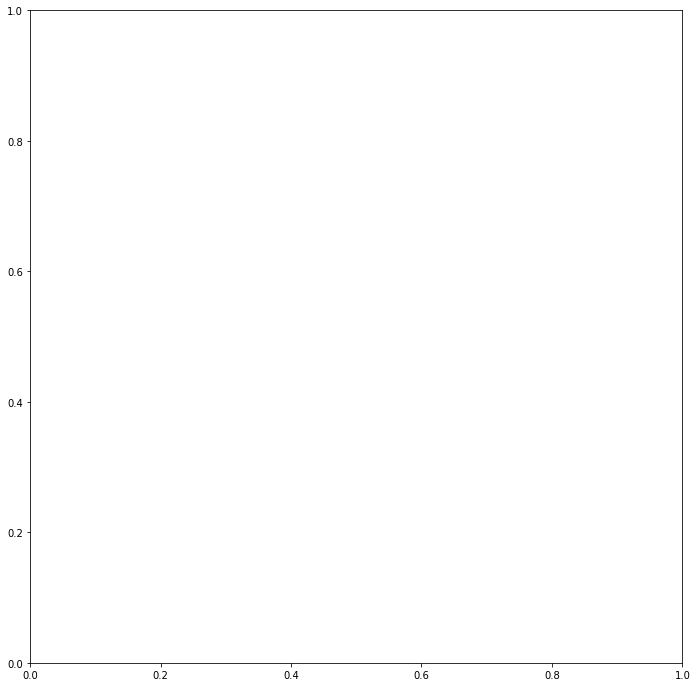

In [125]:
y_pred = model.predict(X)

y_pred = np.squeeze(y_pred, axis = 0)

y_pred = np.squeeze(y_pred, axis = 3)

y_pred.shape
show_image(y_pred)

In [77]:
image = y_pred[7, :, :]

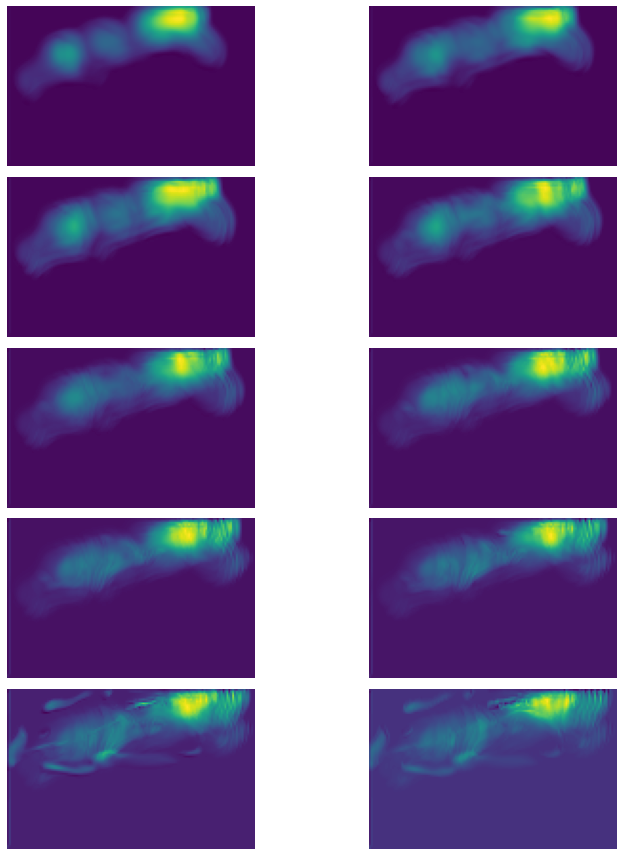

In [78]:
show_images(y_pred, nrows=5)

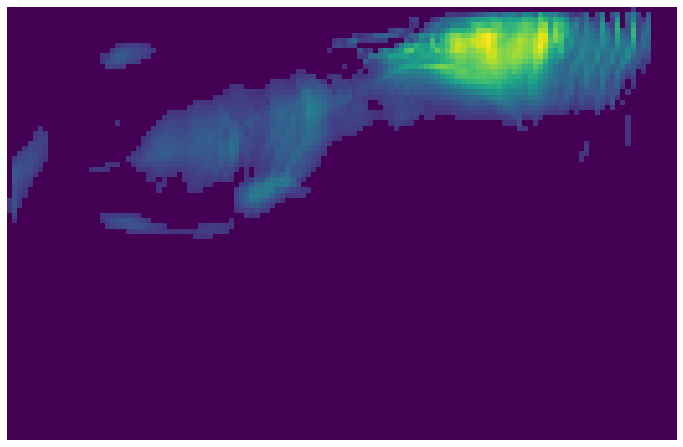

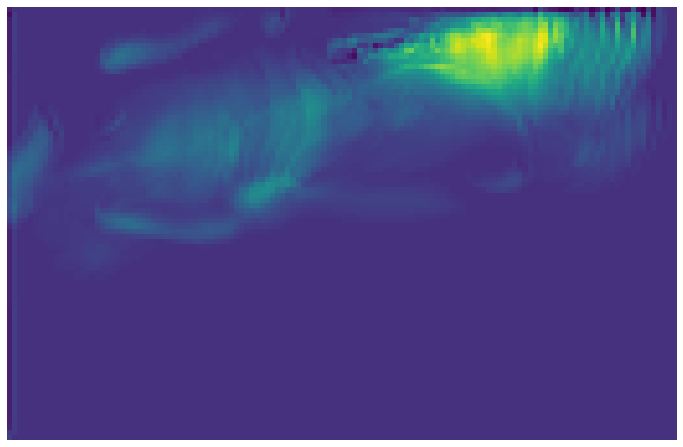

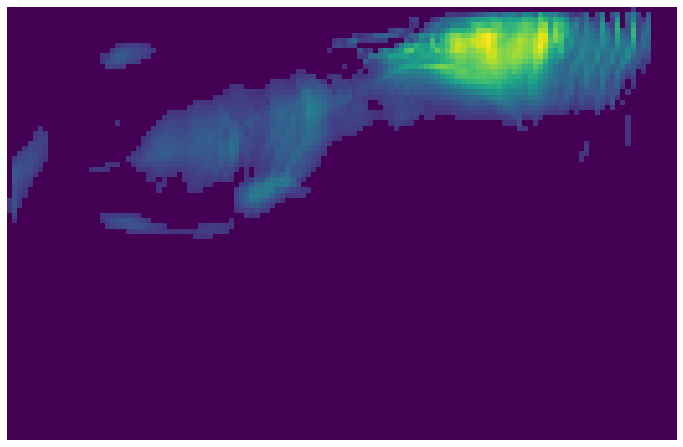

In [123]:
image_2 = y_pred[-1, :, :] 
image_2.shape, show_image(image_2)

image_3 = image_2.copy()

image_3[image_2 < 0.003] = 0
image_3.shape
show_image(image_3)

In [122]:
image_3.shape

(84, 130)

In [98]:
from PIL import Image 
  
def convertImage(): 
    img = Image.open("./img_test.png") 
    img = img.convert("RGBA") 
  
    datas = img.getdata() 
  
    newData = [] 
  
    for item in datas: 
        if item[0] >= 200 and item[1] >= 200 and item[2] >= 200: 
            newData.append((255, 255, 255, 0)) 
        else: 
            newData.append(item) 
  
    img.putdata(newData) 
    img.save("./New.png", "PNG") 
    print("Successful") 
  


In [99]:
convertImage() 

Successful


NameError: name 'Image' is not defined

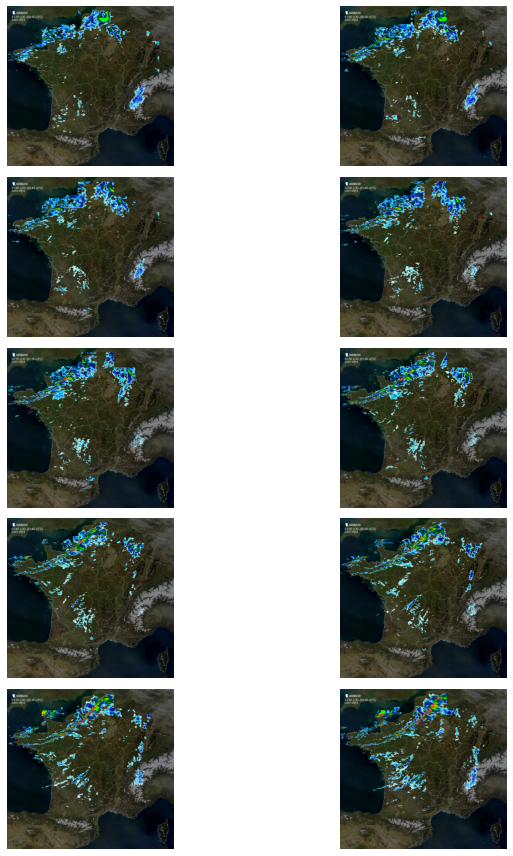

In [69]:
show_images(imgs, nrows=5)

TypeError: Invalid shape (1, 10, 84, 130) for image data

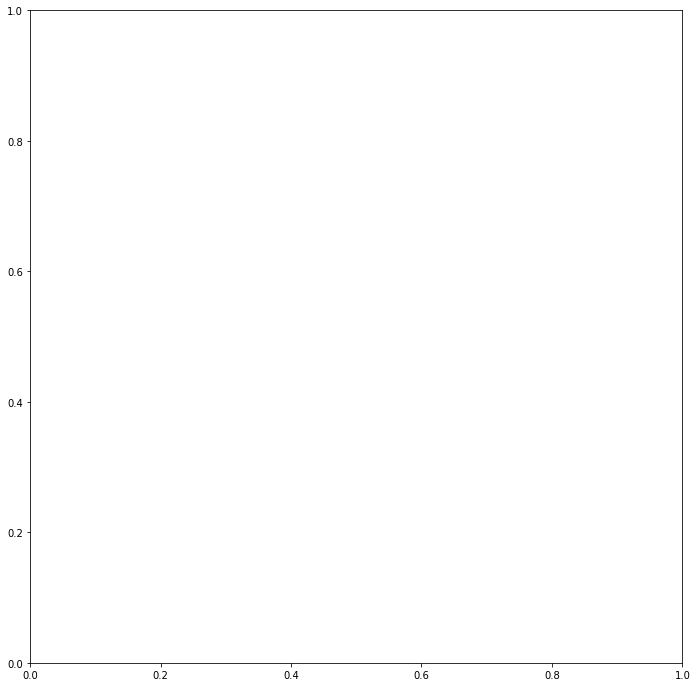

In [76]:
show_image([y_pred > 0.003])

TypeError: Invalid shape () for image data

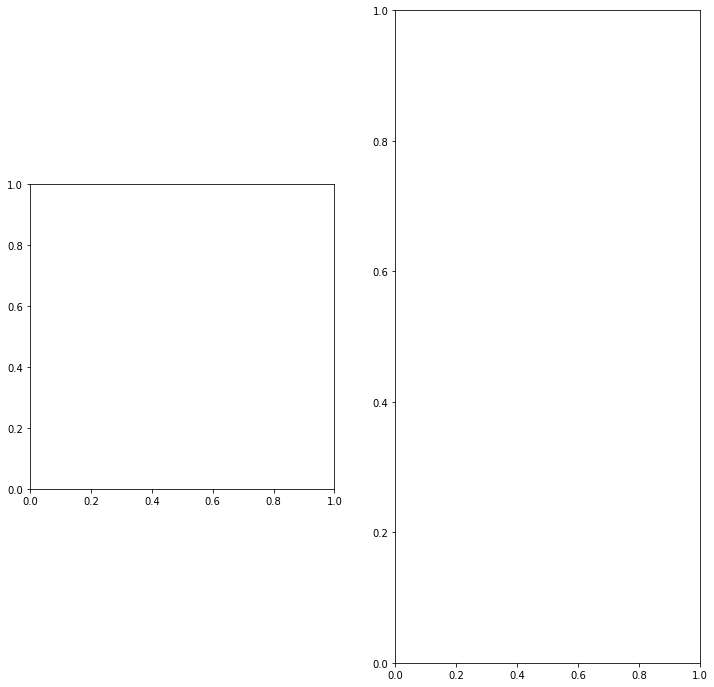